In [1]:
import sys
import pandas as pd
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from isolation_forest import *

# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

# Database query

In [2]:
df = database_query("SELECT * FROM SensorData LIMIT 1000000;")
df.head(5)

node_id                            timestamp     x    y  \
0  b'-2393099149039893833'  b'2020-06-24 12:20:08.533016+00:00'  2762 -257   
1  b'-2393099149039893833'  b'2020-06-24 12:20:08.620015+00:00'  2870 -344   
2  b'-2393099149039893833'  b'2020-06-24 12:20:09.622827+00:00'  2916 -344   
3  b'-2393099149039893833'  b'2020-06-24 12:20:09.622846+00:00'  2894 -254   
4  b'-2393099149039893833'  b'2020-06-24 12:20:10.116102+00:00'  2888 -188   

     z  q  
0  100  0  
1  100  0  
2  100  0  
3  100  0  
4  100  0

# Histogram of x and y coordinates

x mean:  2007.42516
y mean:  524.458634
x std:  880.5673627763946
y std:  1056.1131432857248


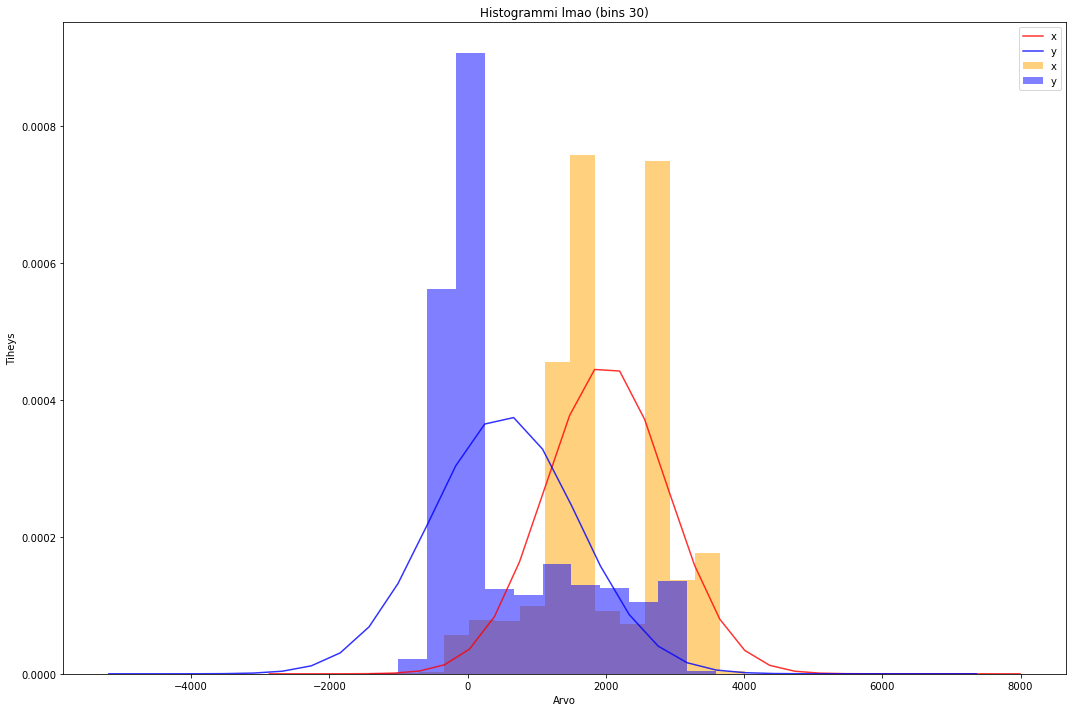

In [10]:
draw_histogram(df['x'], df['y'], 30)

# Find outliers using z_score

Number of missing variables in table
 node_id      0
timestamp    0
x            0
y            0
z            0
q            0
dtype: int64
------------------------------
Unique values in columns

uniques in x 5161
uniques in y 5033
uniques in z 1
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100]
uniques in q [0]
------------------------------
Number of nodes: 3
------------------------------
Outliers

Data with outliers:  1000000
Ouliers removed:     6483
Data after:  993517


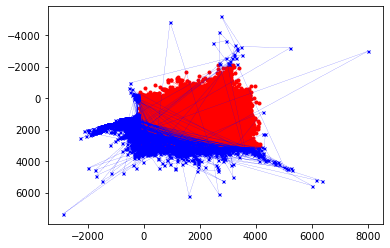

In [3]:
df1 = find_outliers(df)

# Outliers using isolation forest

Dataframe lenght before: 993517
Dataframe lenght after: 794813
Total outliers detected: 198704


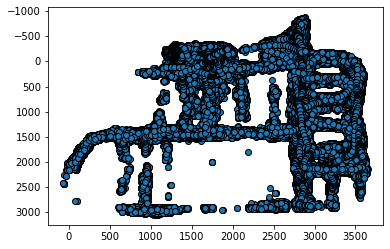

In [12]:
df1 = isolation_forest(df1, 800000, 0, .2)

# Cleaning Node_id, timestamp, q, z columns

In [4]:
df1 = clean_dataframe(df1)
df1.head(5)

node_id               timestamp     x    y
0             1 2020-06-24 15:20:08.533  2762 -257
1             1 2020-06-24 15:20:08.620  2870 -344
2             1 2020-06-24 15:20:09.623  2916 -344
3             1 2020-06-24 15:20:09.623  2894 -254
4             1 2020-06-24 15:20:10.116  2888 -188
...         ...                     ...   ...  ...
999995        3 2020-08-16 12:08:11.426  1938 -267
999996        3 2020-08-16 12:08:20.426  1922 -242
999997        3 2020-08-16 12:08:39.426  2002 -332
999998        3 2020-08-16 12:09:16.426  1961 -281
999999        3 2020-08-16 12:09:35.426  1934 -246

[993517 rows x 4 columns]

# Adding xy_grid values to dataframe (50x50)

In [5]:
df1 = xy_to_grid(df1, df1.x, df1.y, 50)
df1.head(5)

node_id               timestamp    x    y  x_grid  y_grid  xy_grid
0        3 2020-06-26 19:04:51.645 -141 -369       0      16        1
1        2 2020-07-12 10:05:35.793 -192 -217       0      17        2
2        1 2020-10-01 15:20:04.062 -156 -171       0      18        3
3        2 2020-07-12 10:05:36.793 -140 -209       0      18        3
4        2 2020-07-12 10:05:44.793 -107 -178       0      18        3

# Write cleaned and diskretized dataframe to mariadb database

In [ ]:
write_df_to_mariadb(df1)